# **Hands-On K-Means Clustering**

This notebook provides a step-by-step, **visual** implementation of the **K-Means** clustering algorithm. We will:

1. Draw or load data interactively using [drawdata](https://pypi.org/project/drawdata/).  
2. Implement **K-Means** from scratch.  
3. Visualize each iteration using **interactive plotting**.  
4. Assign a **new** data point to one of the learned clusters.

---

## 📚**Recall: What is K-Means?**

**K-Means** is an unsupervised clustering algorithm that partitions data into **k** clusters. The algorithm iterates between two main steps:

1. **Assignment Step**  
   - Assign each data point to the nearest cluster centroid.

2. **Update Step**  
   - Recalculate centroids as the mean of all points in a cluster.

These steps repeat until **convergence**, which can occur when centroid positions stop changing or a maximum number of iterations is reached.

**Key points**:
- We must specify **k** in advance (the number of clusters).
- The algorithm is sensitive to **initial centroid** placement.
- May converge to different final clusters depending on initial conditions.



## **Installing and Using the `drawdata` Library**

The `drawdata` library allows you to **interactively draw** data points in a Jupyter notebook cell. We can then store these points for clustering.


In [1]:
!pip install drawdata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.8/234.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.6/218.6 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 765.5/765.5 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.9 MB/s eta 0:00:00


## **Importing and Drawing Data**

In [2]:
from drawdata import ScatterWidget

widget = ScatterWidget()
widget


ScatterWidget()

**Explanation:**  
- Import the `ScatterWidget` from `drawdata`.  
- Create a `widget` to interactively draw points in the notebook.  
- Running this cell will show a widget where you can **draw** a scatter plot of points.  

After drawing, you can click "Done" or the checkmark in the widget to finalize your dataset.


##**Converting the Drawn Data to NumPy**

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Access the drawn data as a dictionary or a pandas DataFrame
data_dictionary = widget.data
pandas_dataset = widget.data_as_pandas

# Extract x, y columns and convert to a NumPy array
x = pandas_dataset['x']
y = pandas_dataset['y']
data = np.array(list(zip(x, y)))


**Explanation:**  
- Retrieves the **drawn data** from the widget as both a **dictionary** and a **pandas DataFrame**.  
- Extracts **x** and **y** columns from the DataFrame.  
- Converts to a **NumPy array** named `data`, which is easier to handle for numeric operations in K-Means.

---


##**K-Means Parameters and Initialization**

We will define:
- **k**: Number of clusters (e.g., 2).  
- **max_iters**: Maximum number of iterations (e.g., 10).  
- **Initial centroids**: Randomly picked from the data points.  


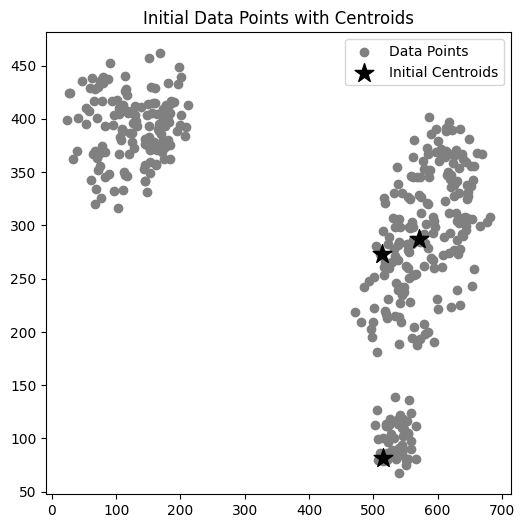

In [16]:
k = 3          # Number of clusters
max_iters = 15 # Maximum iterations

# Seed for reproducibility
# np.random.seed(30)

# Randomly choose k points from the dataset as initial centroids
initial_centroid_indices = np.random.choice(range(data.shape[0]), k, replace=False)
centroids = data[initial_centroid_indices]

# Plot the initial points (gray) and centroids (black stars)
plt.figure(figsize=(6, 6))
plt.scatter(data[:, 0], data[:, 1], c='gray', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black', label='Initial Centroids')
plt.title("Initial Data Points with Centroids")
plt.legend()
plt.show(block=False)
plt.pause(2)  # Pause for 2 seconds to allow inspection of the initial state


**Explanation:**  
- Sets **k=2** and **max_iters=10**.  
- Initializes centroids by randomly selecting **k** distinct points from the dataset.  
- **Plots** all data points in **gray** and initial centroids in **black** stars to visualize the starting point.  
- Uses `plt.pause(2)` to briefly show the figure before continuing.


##**Implementing the K-Means Algorithm (Step by Step)**

**Algorithm Outline**:
1. **Assignment**: Assign each point to the cluster whose centroid is **closest** (in Euclidean distance).
2. **Update**: Recalculate each centroid as the **mean** of the points in its cluster.
3. **Convergence Check**: If centroids do not move significantly (within a tolerance) or you hit `max_iters`, stop.

We’ll visualize each **iteration** using **interactive** plotting in matplotlib.



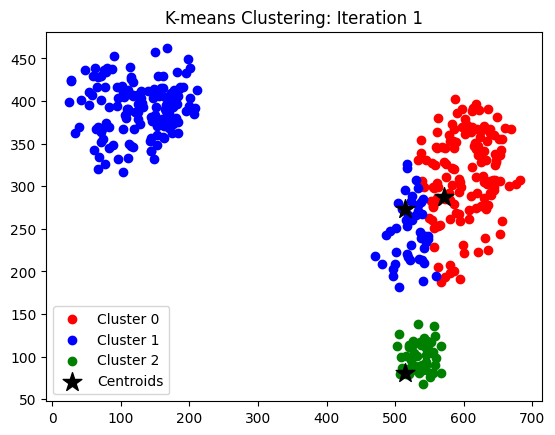

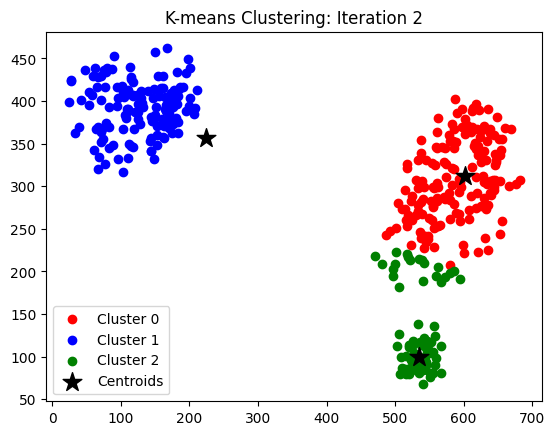

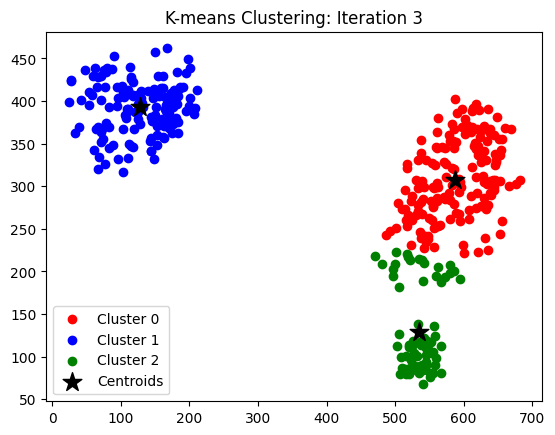

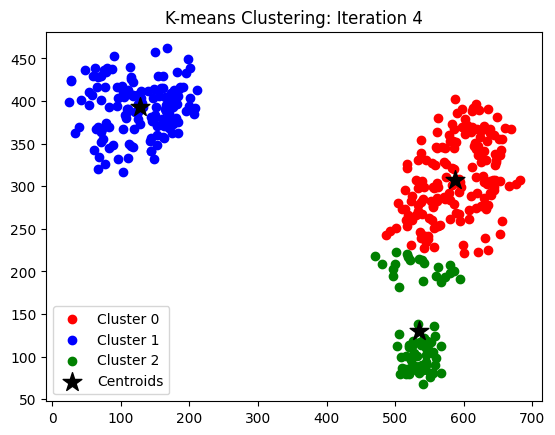

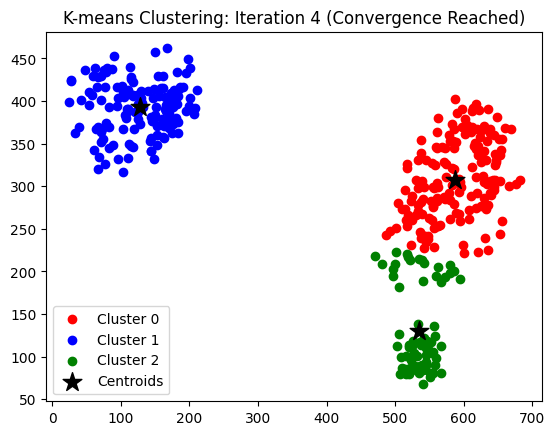

In [17]:
# Colors for plotting different clusters
colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k']

# Turn on interactive plotting
plt.ion()

def euclidean_distance(a, b):
    """Compute Euclidean distance between two points a and b."""
    return np.linalg.norm(a - b)

for iteration in range(max_iters):
    # Dictionary to hold cluster assignments: cluster index -> list of points
    clusters = {i: [] for i in range(k)}

    # --- Assignment Step ---
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster_idx = np.argmin(distances)
        clusters[cluster_idx].append(point)

    # Clear plot for the iteration's visualization
    plt.clf()

    # Plot each cluster with a distinct color
    for idx, cluster_points in clusters.items():
        cluster_points = np.array(cluster_points)
        if len(cluster_points) > 0:
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                        c=colors[idx % len(colors)], label=f'Cluster {idx}')

    # Plot centroids as black stars
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200,
                c='black', label='Centroids')

    plt.title(f'K-means Clustering: Iteration {iteration + 1}')
    plt.legend()
    plt.pause(1)  # Pause for visualization

    # --- Update Step ---
    new_centroids = []
    for idx in range(k):
        if clusters[idx]:  # If cluster is not empty
            new_centroid = np.mean(clusters[idx], axis=0)
        else:
            # Reinitialize centroid if cluster is empty
            new_centroid = data[np.random.choice(range(data.shape[0]))]
        new_centroids.append(new_centroid)
    new_centroids = np.array(new_centroids)

    # --- Convergence Check ---
    if np.allclose(centroids, new_centroids):
        # If centroids do not change, we've converged
        centroids = new_centroids
        plt.clf()
        for idx, cluster_points in clusters.items():
            cluster_points = np.array(cluster_points)
            if len(cluster_points) > 0:
                plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                            c=colors[idx % len(colors)], label=f'Cluster {idx}')
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200,
                    c='black', label='Centroids')
        plt.title(f'K-means Clustering: Iteration {iteration + 1} (Convergence Reached)')
        plt.legend()
        plt.pause(1)
        break

    # Otherwise, continue with next iteration
    centroids = new_centroids

# Turn off interactive plotting and display final results
plt.ioff()
plt.show()


**Explanation:**  
1. **Colors**: Defined to differentiate each cluster visually.  
2. **Assignment Step**:  
   - For each point, compute distances to all centroids.  
   - Assign the point to the cluster with the **nearest** centroid.  
3. **Update Step**:  
   - Recalculate each centroid as the **mean** of all points assigned to that cluster.  
   - If a cluster is empty, pick a **random** point from the dataset to reinitialize that centroid.  
4. **Convergence Check**:  
   - Uses `np.allclose` to see if the new centroids have changed significantly from the old ones.  
   - If they haven’t, the algorithm has converged, and we can **stop** early.  
5. **Interactive Plotting**:  
   - Each iteration is shown in real-time.  
   - Once done, we turn off interactive mode (`plt.ioff()`).

## **Assigning a New Data Point to the Learned Clusters**


The new data point [  0 400] belongs to cluster 1


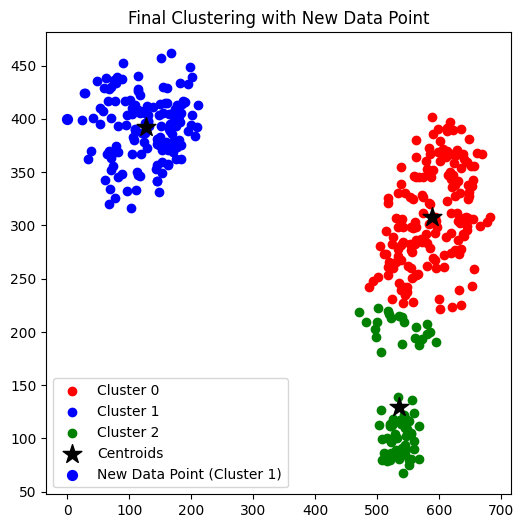

In [20]:
# Assume the final centroids from the K-means algorithm are stored in 'centroids'
# 'colors', 'data', and 'k' are also already defined.

# Define a new data point
new_point = np.array([0, 400])  # Example: A point far from your drawn data

# Compute distances to each centroid
distances = [np.linalg.norm(new_point - centroid) for centroid in centroids]

# Determine the closest centroid
assigned_cluster = np.argmin(distances)
print("The new data point", new_point, "belongs to cluster", assigned_cluster)

# Visualization of final clusters, centroids, and the new data point
plt.figure(figsize=(6, 6))

# Reassign data points to clusters based on final centroids (for a fresh plot)
for idx in range(k):
    cluster_points = np.array([
        point for point in data
        if np.argmin([np.linalg.norm(point - c) for c in centroids]) == idx
    ])
    if cluster_points.size > 0:
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                    c=colors[idx], label=f'Cluster {idx}')

# Plot final centroids as black stars
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200,
            c='black', label='Centroids')

# Plot the new data point in the color of its assigned cluster
plt.scatter(new_point[0], new_point[1],
            c=colors[assigned_cluster], s=50,
            label=f'New Data Point (Cluster {assigned_cluster})')

plt.title("Final Clustering with New Data Point")
plt.legend()
plt.show()


**Explanation:**  
- Defines a **new data point** (`new_point`).  
- Calculates its **Euclidean distance** to each final centroid.  
- **Finds the closest centroid** and prints the assigned cluster.  
- Plots the final clusters, centroids, and highlights the **new point** with the cluster color.


## **Observations and Key Insights:**

1. **Effect of k**: Changing the number of clusters can dramatically alter the partitions.  
2. **Initial Centroids**: K-Means is sensitive to initial placements. Different random choices can lead to different local minima.  
3. **Distance Metric**: We used **Euclidean** distance (`np.linalg.norm`), but other metrics are possible (e.g., Manhattan distance).  
4. **Scalability**: K-Means scales well to large datasets but can struggle with complex cluster shapes or outliers.



## **Optional: "Do It Yourself" Exercises**

1. **Vary k**  
   - Try different values of k (e.g., 3, 4). Compare how your clusters form.  
   - Which value of k seems “best”? (This often involves the **elbow method** or **silhouette score**.)

2. **Change the Dataset**  
   - Use `drawdata` to create more complex or overlapping clusters. How does K-Means handle them?

3. **Reinitialize Empty Clusters**  
   - Currently, if a cluster becomes empty, we randomly pick a new centroid.
   - Try other reinitialization strategies (e.g., pick the farthest point from existing centroids).

4. **Evaluate Different Distance Metrics**  
   - Implement Manhattan (`L1`) distance. Does it change your final clusters?

5. **Compare with Library Implementation**  
   - Use **scikit-learn**’s `KMeans` to cluster the same data.
   - Check if your manual algorithm yields similar results.



## 🔗 **Additional Useful Resources:**

### 📖 Kaggle Notebooks:
- [🔗 K-Means Clustering with Python](https://www.kaggle.com/code/prashant111/k-means-clustering-with-python)  
  *A comprehensive guide to implementing K-Means clustering using Python, covering preprocessing, model building, and visualization.*
  
- [🔗 Clustering With K-Means](https://www.kaggle.com/code/ryanholbrook/clustering-with-k-means)  
  *An in-depth exploration of K-Means clustering, including discussions on choosing the number of clusters and model evaluation.*

### 🎥 YouTube Tutorials:
- [🔗 K-means clustering: How it Works](https://www.youtube.com/watch?v=_aWzGGNrcic)  
  *Explains the K-Means algorithm step-by-step, with illustrations of how clustering works.*

- [🔗 StatQuest: K-Means Clustering](https://www.youtube.com/watch?v=4b5d3muPQmA)  
  *A detailed, beginner-friendly walkthrough of K-Means clustering, breaking down key concepts.*


